## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from bayes_opt import BayesianOptimization

from helpers import *
import plots

## Rastrigin function

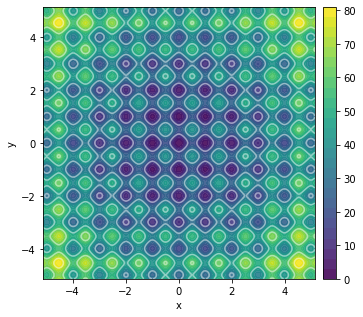

In [2]:
plots.visualize_rastrigin()
plt.savefig('plots/rastrigin.pdf', bbox_inches='tight')

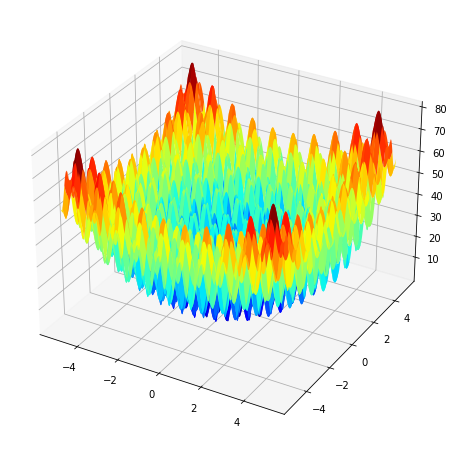

In [3]:
plots.visualize_rastrigin_3d()

## Visualizing Gaussian Process

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  34.11    | -4.339    |
|   iter    |  target   |     x     |
-------------------------------------
|  2        |  28.5     |  5.112    |


c:\Users\franc\ProgramsAltri\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


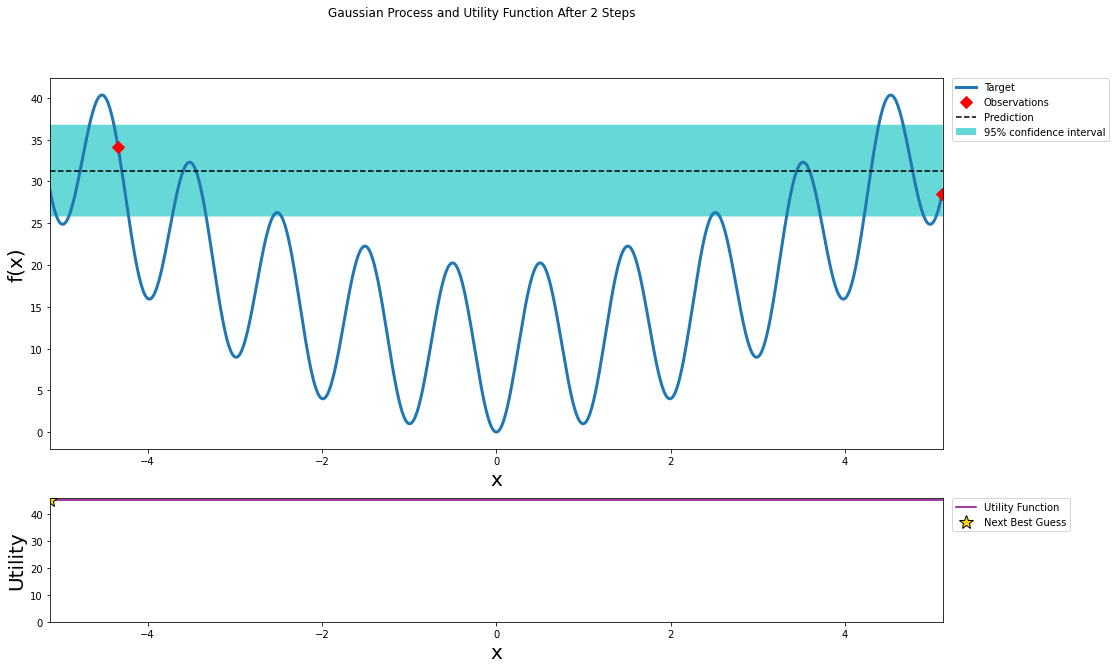

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  4.275    |  0.1525   |


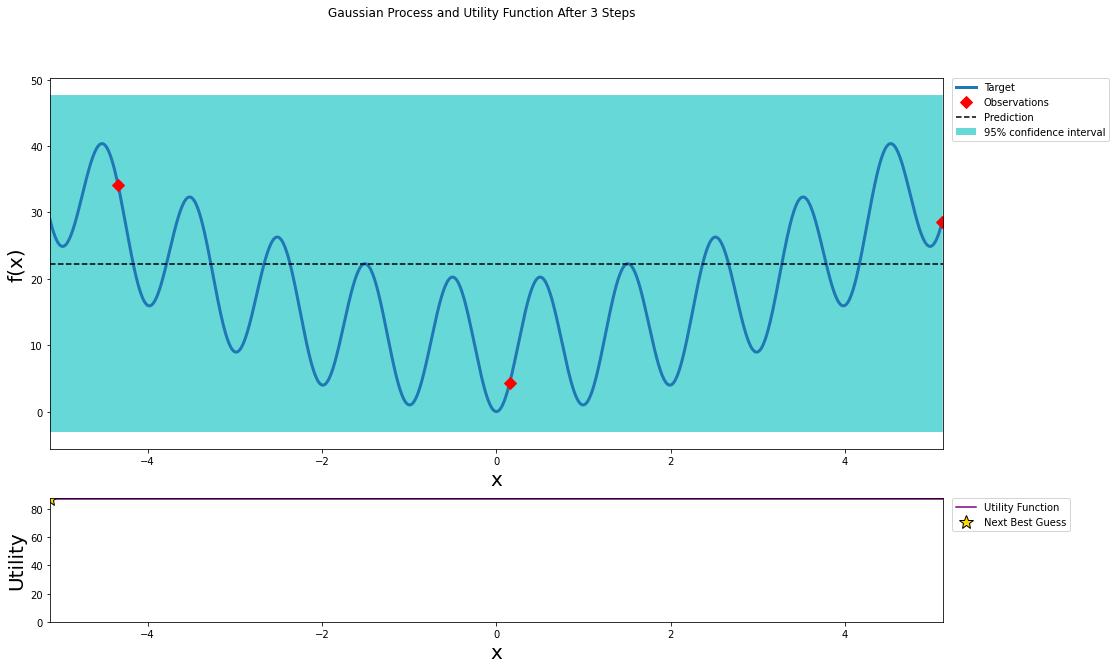

|   iter    |  target   |     x     |
-------------------------------------
|  4        |  34.1     | -4.338    |


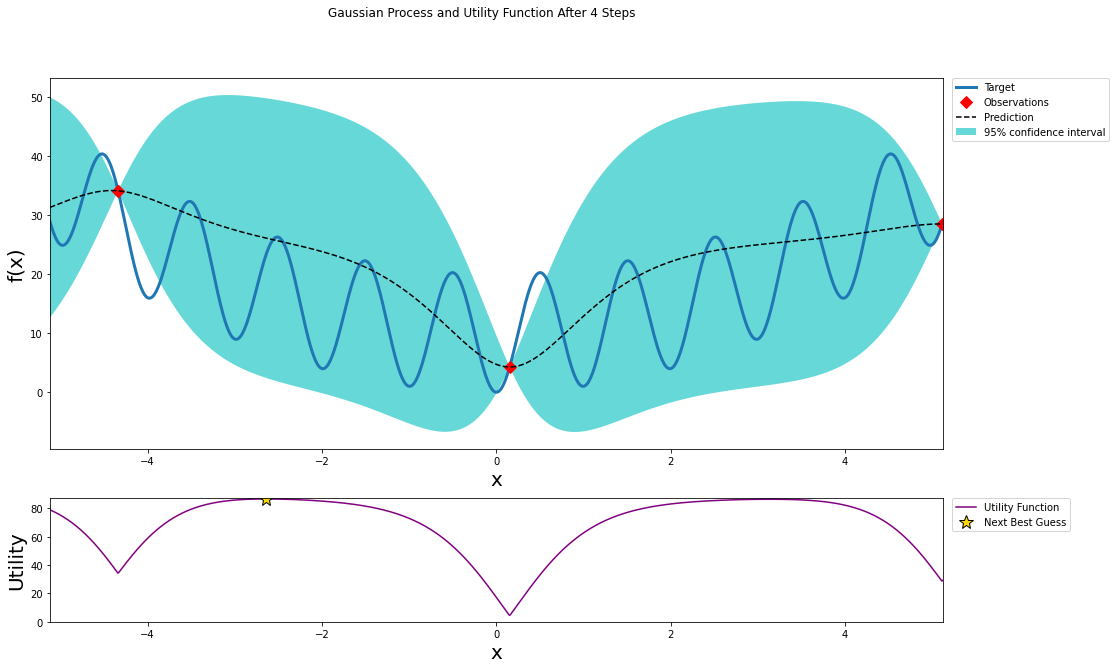

|   iter    |  target   |     x     |
-------------------------------------
|  5        |  23.16    | -2.644    |


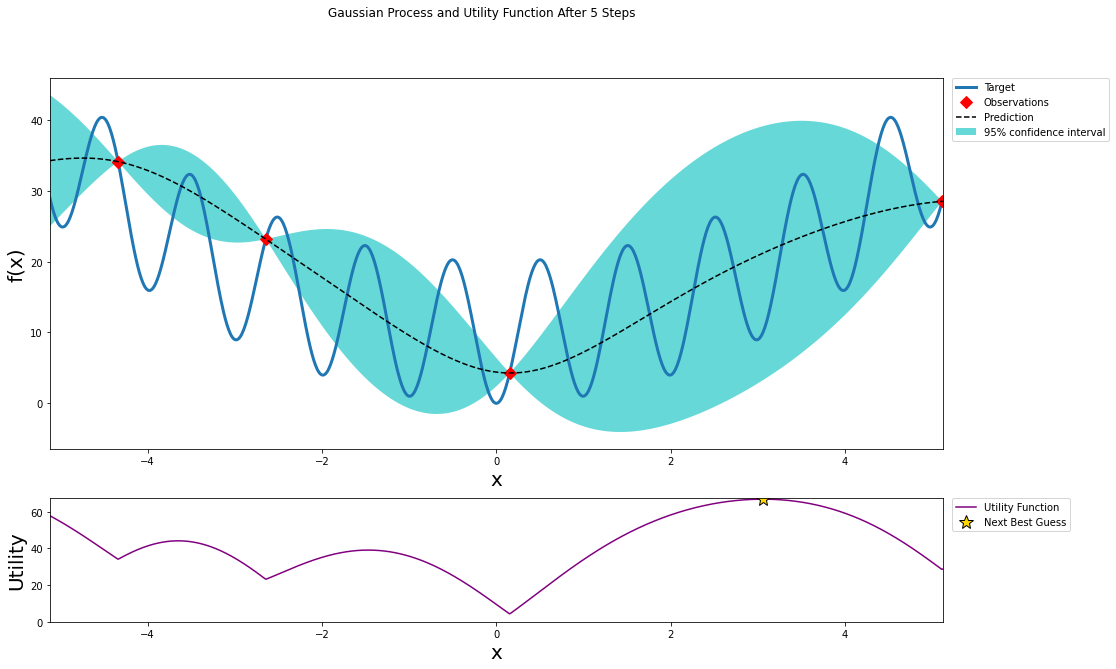

|   iter    |  target   |     x     |
-------------------------------------
|  6        |  9.987    |  3.057    |


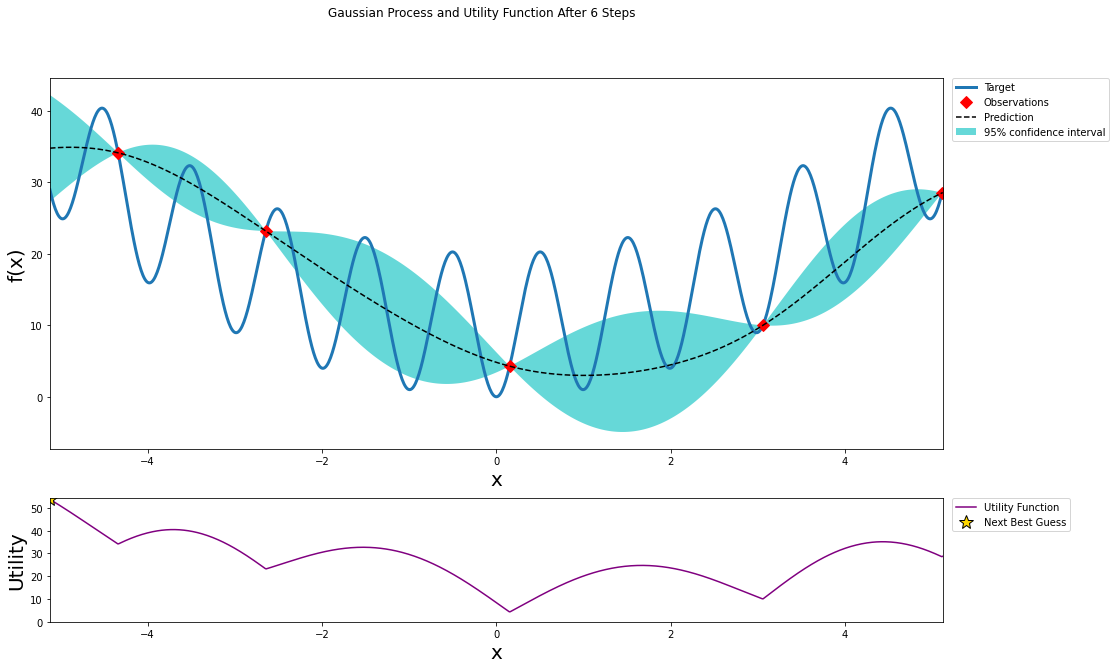

|   iter    |  target   |     x     |
-------------------------------------
|  7        |  28.92    | -5.12     |


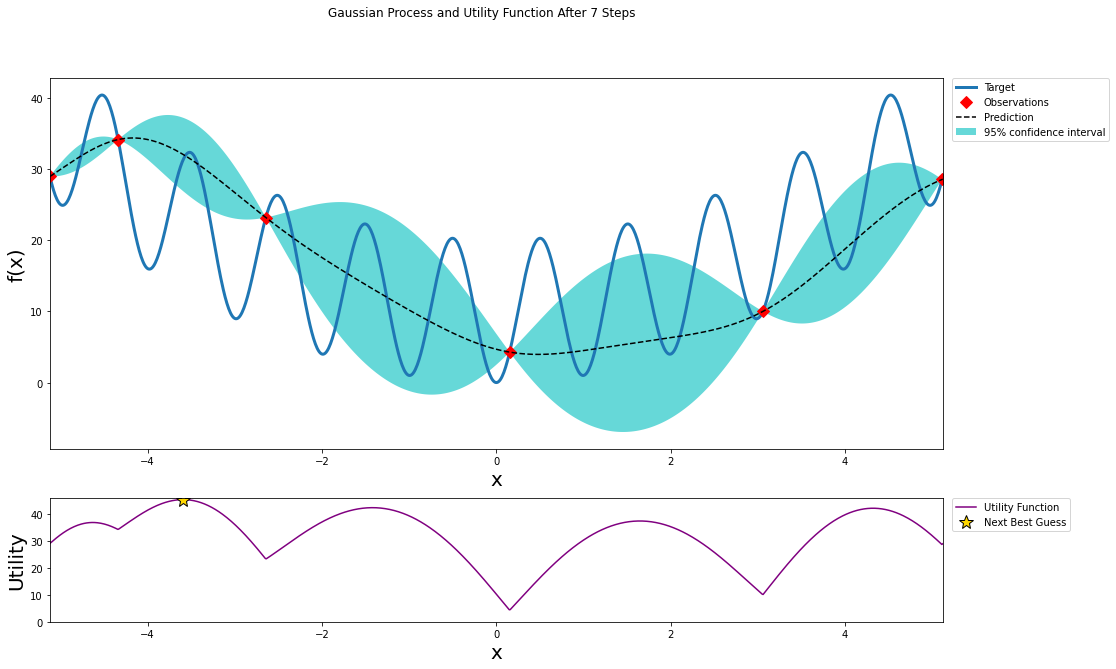

|   iter    |  target   |     x     |
-------------------------------------
|  8        |  31.24    | -3.593    |


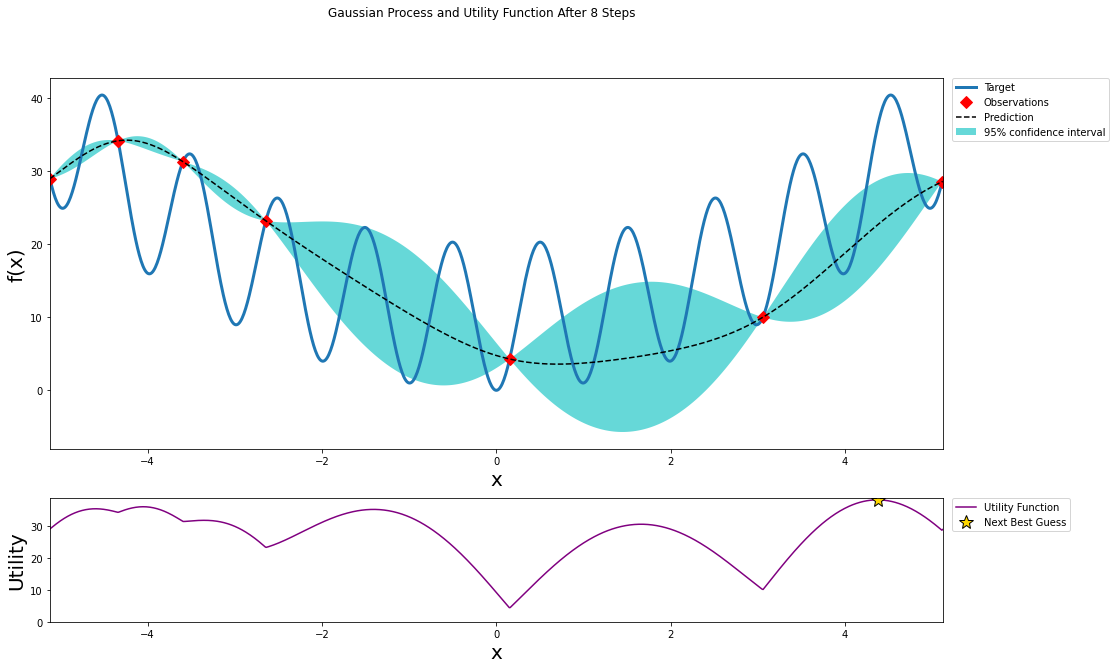

|   iter    |  target   |     x     |
-------------------------------------
|  9        |  35.99    |  4.371    |


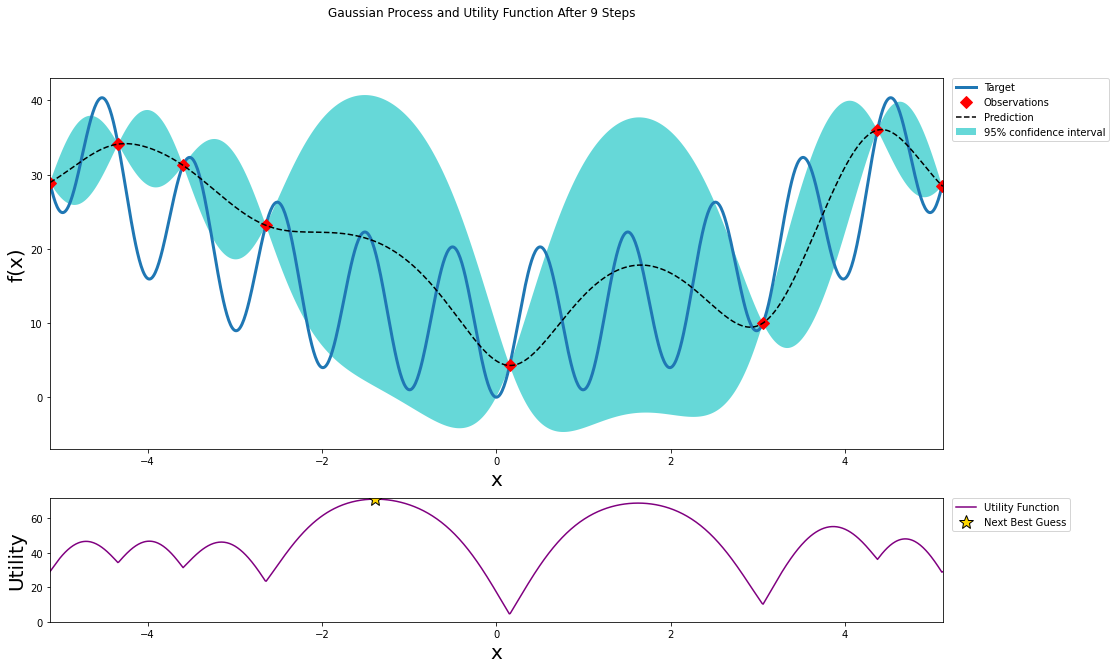

|   iter    |  target   |     x     |
-------------------------------------
|  10       |  19.59    | -1.389    |


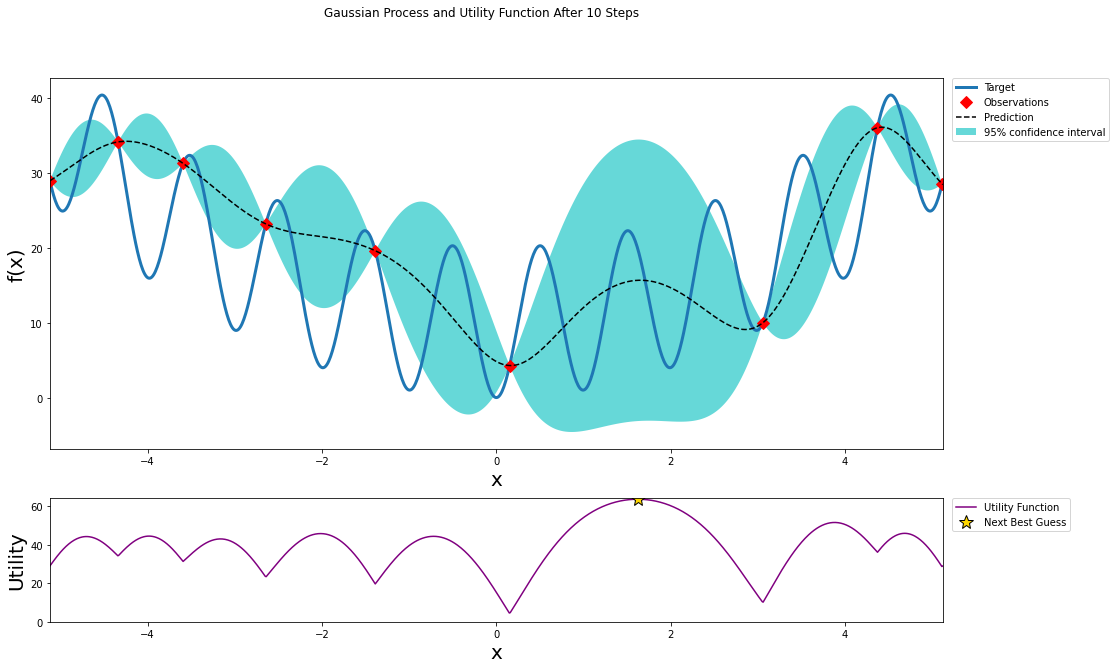

|   iter    |  target   |     x     |
-------------------------------------
|  11       |  19.89    |  1.621    |


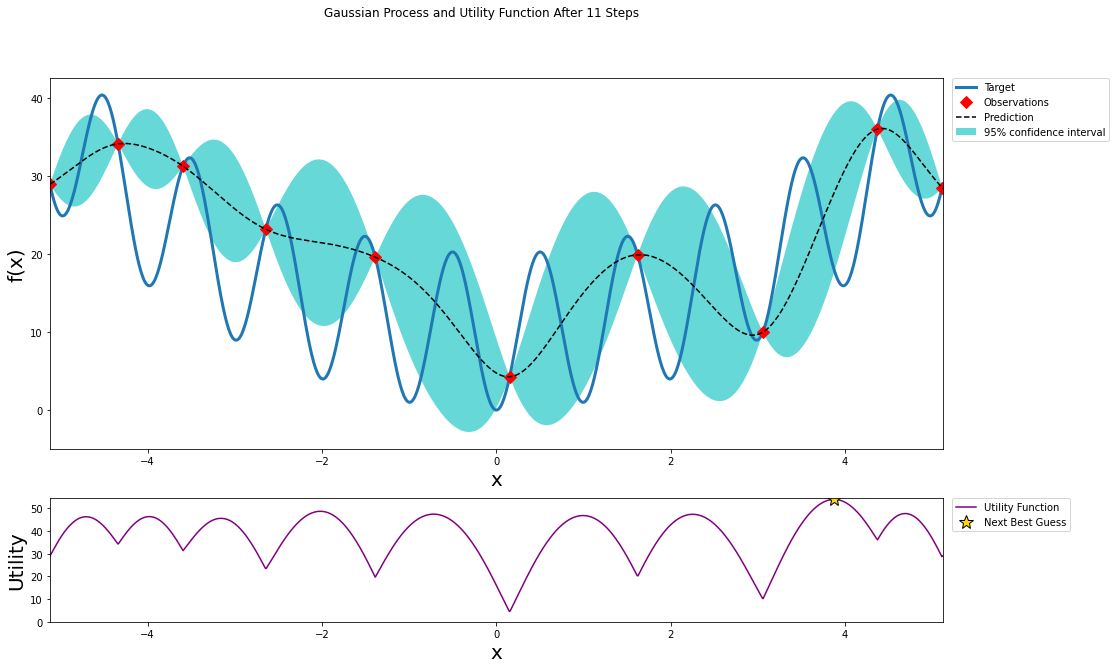

|   iter    |  target   |     x     |
-------------------------------------
|  12       |  17.99    |  3.874    |


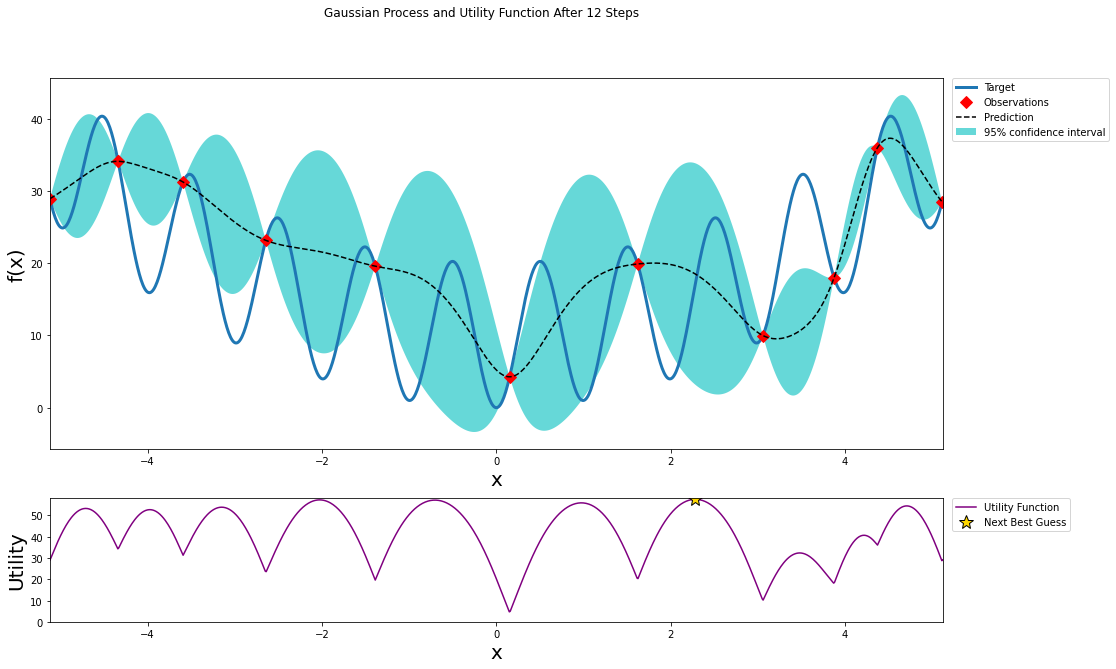

|   iter    |  target   |     x     |
-------------------------------------
|  13       |  17.22    |  2.282    |


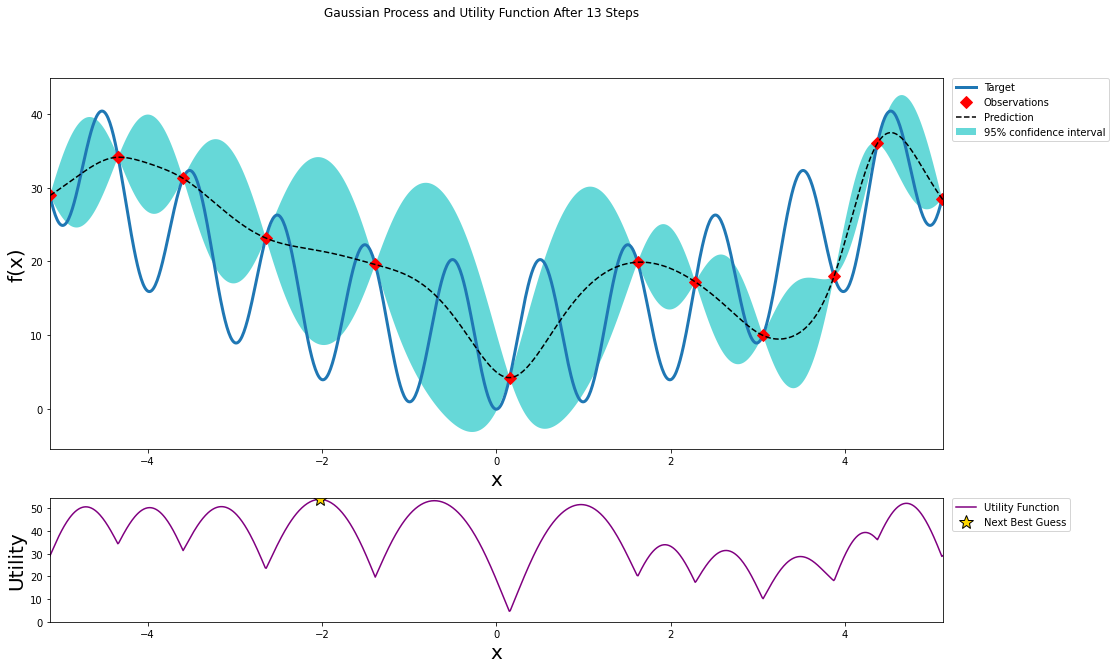

In [4]:
plots.visualize_bayesian(12, seed=7)

## Final points

In [2]:
def simulate_rastrigin(n_samples, lr, max_iters, n_random=1, n_bayes=0):
    """Simulate weight initialization + gradient descent for the Rastrigin function.
       
       parameters:
           * function: function class with __call__ and grad methods, the objective to run GD on
           * initial_x: float, Starting point x
           * initial_y: float, Starting point y
           * learning_rate: float, learning rate of GD
           * max_iters: int, What number of iterations to run GD for
           * print_p: bool, to print status or not
    """
    rastrigin = Rastrigin(10)
    bound = [-5.12, 5.12]
    final_obj = []
    final_points = []
    np.random.seed(0)
    random.seed(0)

    for _ in tqdm(range(n_samples)):
        optimizer = BayesianOptimization(f=lambda x, y: -rastrigin(x, y), pbounds={"x": bound, "y": bound}, verbose=0)
        optimizer.maximize(init_points=n_random, n_iter=n_bayes)
        x_init, y_init = list(optimizer.max['params'].values())

        objectives, xs = gradient_descent(rastrigin, x_init, y_init, lr, max_iters, verbose=0)
        final_obj.append(objectives[-1])
        final_points.append(xs[-1])
    
    return final_points, final_obj

100%|██████████| 10000/10000 [00:24<00:00, 415.38it/s]


count    10000.000000
mean        17.661703
std         11.243345
min          0.000000
25%          8.954601
50%         16.914203
75%         24.873845
max         49.747446
dtype: float64


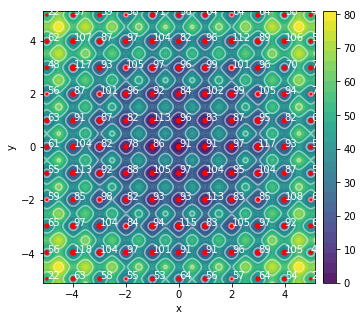

In [4]:
final_points, final_obj = simulate_rastrigin(n_samples=10000, lr=1e-3, max_iters=50, n_random=1, n_bayes=0)
print(pd.Series(final_obj).describe())
plots.visualize_rastrigin(final_points=final_points)
plt.savefig('plots/rastrigin_1random_0bayes.pdf', bbox_inches='tight')

100%|██████████| 10000/10000 [00:41<00:00, 242.68it/s]


count    10000.000000
mean         6.804205
std          5.525402
min          0.000000
25%          1.989918
50%          4.974790
75%          9.949560
max         33.828324
dtype: float64


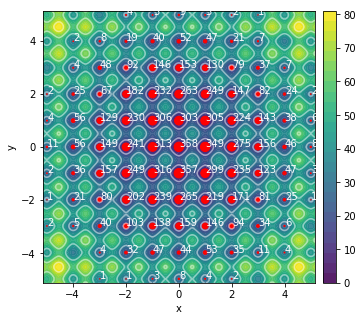

In [5]:
final_points, final_obj = simulate_rastrigin(n_samples=10000, lr=1e-3, max_iters=50, n_random=10, n_bayes=0)
print(pd.Series(final_obj).describe())
plots.visualize_rastrigin(final_points=final_points)
plt.savefig('plots/rastrigin_10random_0bayes.pdf', bbox_inches='tight')

100%|██████████| 10000/10000 [2:35:47<00:00,  1.07it/s] 


count    10000.000000
mean         7.874573
std          6.730170
min          0.000000
25%          1.989918
50%          4.974790
75%          9.949560
max         40.792967
dtype: float64


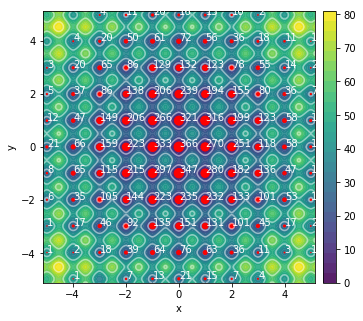

In [6]:
final_points, final_obj = simulate_rastrigin(n_samples=10000, lr=1e-3, max_iters=50, n_random=2, n_bayes=8)
print(pd.Series(final_obj).describe())
plots.visualize_rastrigin(final_points=final_points)
plt.savefig('plots/rastrigin_2random_8bayes.pdf', bbox_inches='tight')